In [1]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
import numpy as np
from sklearn.decomposition import PCA


from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
#from bokeh.palettes import brewer, Viridis256
import re

!pip install colorcet
import colorcet as cc
import matplotlib.colors as colors
from colorcet.plotting import swatch, swatches, candy_buttons
import pandas as pd

In [2]:
# cargamos los datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)

In [3]:
len(lfw_people.images)

1288

In [4]:
for name in lfw_people.target_names:
    print (name)
    
n_samples, h, w = lfw_people.images.shape

X_real = lfw_people.data
X = lfw_people.data
scaler = StandardScaler(with_mean=True,with_std=True)

y = lfw_people.target
target_names = lfw_people.target_names

from sklearn.model_selection import train_test_split

X_train , X_test, X_real_train, X_real_test, y_train, y_test, names_train, names_test = train_test_split(X, X_real, y, target_names[y],
test_size =0.2 , random_state =42)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


In [ ]:
cov = np.cov(X_train.T)
eig_val, eig_vec = np.linalg.eig(cov)

In [6]:
n_components = 5

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = X_train*np.reshape(eigenfaces[1],11750)+X_train*np.reshape(eigenfaces[0],11750)
X_test_pca = X_test*np.reshape(eigenfaces[1],11750)+X_test*np.reshape(eigenfaces[0],11750)

Extracting the top 5 eigenfaces from 1030 faces
Projecting the input data on the eigenfaces orthonormal basis


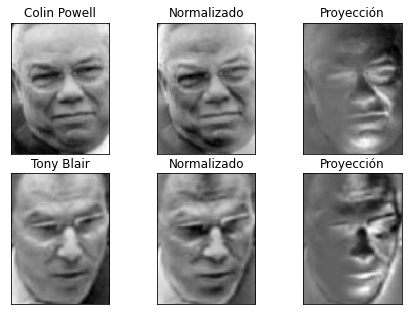

In [6]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.15, wspace=0.05)
# plot 25 random faces
j = 1
np.random.seed(0)

for i in np.random.choice(range(X_train.shape[0]), 2):
  ax = fig.add_subplot(3, 3, j, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_real_train[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title(names_train[i])
  ax = fig.add_subplot(3, 3, j+1, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_train[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Normalizado")
  ax = fig.add_subplot(3, 3, j+2, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_train_pca[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Proyección")
  j += 3
plt.show()

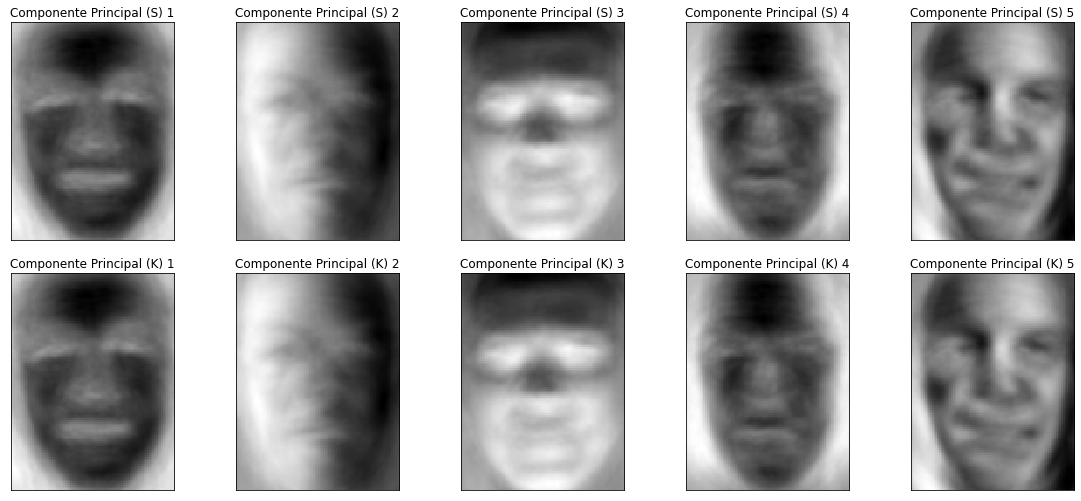

In [21]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.3, hspace=0.15, wspace=0.25)
# Graficamos los primeros 10 componentes
for i in range(5):
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[], title = 'Componente Principal (S) '+str(i+1))
  ax.imshow(np.reshape(pca.components_[i,:], (125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax = fig.add_subplot(2, 5, i+6, xticks=[], yticks=[], title = 'Componente Principal (K) '+str(i+1))
  ax.imshow(np.reshape(pca.components_[i,:], (125,94)), cmap=plt.cm.gray, interpolation='nearest')


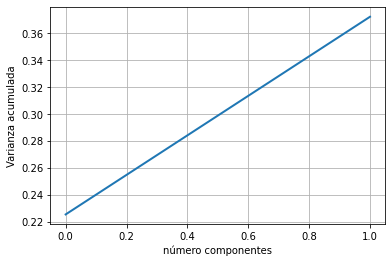

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.grid(), plt.axis('tight'), plt.xlabel('número componentes'), plt.ylabel('Varianza acumulada')
plt.show()

In [9]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [10]:
X_train_pca

array([[ 1.717601  ,  0.40883923],
       [-0.791879  , -0.54490685],
       [ 0.25076523, -0.46757767],
       ...,
       [-0.9115835 ,  0.22312184],
       [-0.47122297,  0.88950926],
       [-1.4275502 , -0.79811513]], dtype=float32)

In [ ]:
lab = np.concatenate([np.repeat(i,10) for i in range(1,41)]) #10 fotos por sujeto

color_df= pd.DataFrame(names_test,columns=["names"])
color_df["color"] = color_df.names.replace({'George W Bush':'blue', 
                                             'Tony Blair':'green',
                                             'Gerhard Schroeder':'black',
                                             'Colin Powell':'violet',
                                             'Donald Rumsfeld': 'red', 
                                             'Ariel Sharon': 'gold',
                                             'Hugo Chavez': 'cyan'})

# diccionario con los datos para la grafica de Bokeh
pc_source = dict(x=X_test_pca[:,0], y=X_test_pca[:,1], label=lab, color=color_df.color.to_list(), 
                 desc=['sujeto: '+str(i) for i in range(1,X_test_pca.shape[0]+1)], imgs=names_test)


output_file("eigenfaces_test.html")

source = ColumnDataSource(data = pc_source)

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="100" alt="@imgs" width="100"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Location</span>
                <span style="font-size: 10px; color: #696;">($x, $y)</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=1000, plot_height=800, tools=[hover], title="Eigenfaces_Test",
          x_axis_label="PC_1",y_axis_label="PC_2")

p.circle('x', 'y', size=7,  color='color', source=source)

show(p)

In [ ]:
color_df= pd.DataFrame(names_train,columns=["names"])
color_df["color"] = color_df.names.replace({'George W Bush':'blue', 
                                             'Tony Blair':'green',
                                             'Gerhard Schroeder':'black',
                                             'Colin Powell':'violet',
                                             'Donald Rumsfeld': 'red', 
                                             'Ariel Sharon': 'gold',
                                             'Hugo Chavez': 'cyan'})

# diccionario con los datos para la grafica de Bokeh
pc_source = dict(x=X_train_pca[:,0], y=X_train_pca[:,1], label=lab, color=color_df.color.to_list(), 
                 desc=['sujeto: '+str(i) for i in range(1,X_train_pca.shape[0]+1)], imgs=names_train)


output_file("eigenfaces_train.html")

source = ColumnDataSource(data = pc_source)

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="100" alt="@imgs" width="100"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Location</span>
                <span style="font-size: 10px; color: #696;">($x, $y)</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=1000, plot_height=800, tools=[hover], title="Eigenfaces_train",
          x_axis_label="PC_1",y_axis_label="PC_2")

p.circle('x', 'y', size=7,  color='color', source=source)

show(p)

# Inciso c)



In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pca = PCA(svd_solver='randomized', whiten=True).fit(X_train)
knn = KNeighborsClassifier(p=2)

pipe = Pipeline(steps=[('pca', pca), ('knn', knn)])

param_grid = {
    'pca__n_components': [5, 15, 45, 60, 90, 120, 135, 150, 120],
    'knn__n_neighbors': [1, 3, 6, 9, 10, 12, 13]
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

KeyboardInterrupt: ignored

In [37]:
pca = PCA(n_components=60,svd_solver='randomized', whiten=True).fit(X_train)
#pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=6,p=2)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [13]:
X_train_pca.shape

(1030, 2)

In [38]:
eigenfaces = pca.components_.reshape((60, h, w))
acc_knn_train = knn.score(X_train_pca, y_train)
acc_knn_test = knn.score(X_test_pca, y_test)
print("El error es en el conjunto de entrenamiento es:", acc_knn_train)
print("El error es en el conjunto de prueba es:", acc_knn_test)

El error es en el conjunto de entrenamiento es: 0.845631067961165
El error es en el conjunto de prueba es: 0.7248062015503876


In [ ]:
X_train.shape

(1030, 11750)

In [ ]:
eigenfaces.shape

(60, 125, 94)

In [39]:
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_proj = np.zeros((1030, 11750))
X_test_proj = np.zeros((258, 11750))
for i in range(eigenfaces.shape[0]):
  X_train_proj = X_train_proj+X_train*np.reshape(eigenfaces[i],11750)
  X_test_proj = X_test_proj+X_test*np.reshape(eigenfaces[i],11750)

Projecting the input data on the eigenfaces orthonormal basis


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(knn.predict(X_train_pca), y_train)

array([[ 52,   2,   1,   0,   1,   2,   0],
       [  4, 174,   2,   2,   4,   4,   3],
       [  1,   1,  74,   9,   6,   0,   0],
       [  7,   9,  19, 396,  22,  13,  24],
       [  1,   1,   2,   0,  52,   5,   1],
       [  0,   0,   0,   0,   1,  34,   0],
       [  1,   2,   1,   4,   4,   0,  89]])

In [41]:
dic_names = {0:'Ariel Sharon',1:'Colin Powell', 2:'Donald Rumsfeld', 3:'George W Bush',  4:'Gerhard Schroeder',
5:'Hugo Chavez', 6:'Tony Blair'}

In [42]:
proba_test = pd.DataFrame(knn.predict_proba(X_test_pca))
proba_test["max_prob"] = proba_test.max(axis=1)
proba_test["name_max_prob"] = [dic_names[i] for i in proba_test.idxmax(axis=1)]
proba_test["neighbors"] = pd.DataFrame(knn.kneighbors(X_test_pca)[1])[0].tolist()

proba_train = pd.DataFrame(knn.predict_proba(X_train_pca))
proba_train["max_prob"] = proba_train.max(axis=1)
proba_train["name_max_prob"] = [dic_names[i] for i in proba_train.idxmax(axis=1)]
proba_train["neighbors"] = pd.DataFrame(knn.kneighbors(X_train_pca)[1])[0].tolist()

37
235


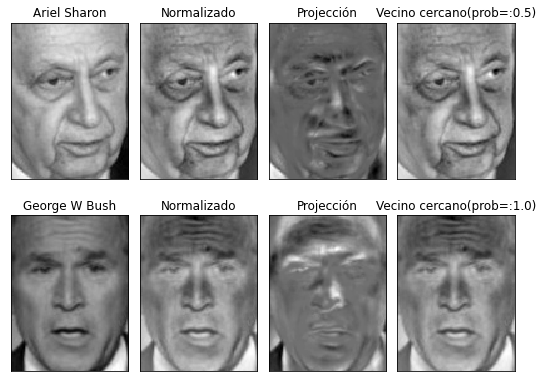

In [43]:
fig = plt.figure(figsize=(7,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.15, wspace=0.10)
# plot 25 random faces
j = 1
np.random.seed(1)

for i in np.random.choice(range(X_test.shape[0]), 2):
  print(i)
  ax = fig.add_subplot(2, 4, j, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_real_train[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title(names_train[i])
  ax = fig.add_subplot(2, 4, j+1, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_train[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Normalizado")
  ax = fig.add_subplot(2, 4, j+2, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_train_proj[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Projección")
  ax = fig.add_subplot(2, 4, j+3, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_train[proba_train.loc[i,"neighbors"],:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Vecino cercano(prob="+":"+str(np.round(proba_train.loc[i,"max_prob"],2))+")")
  j += 4
plt.show()

125
15


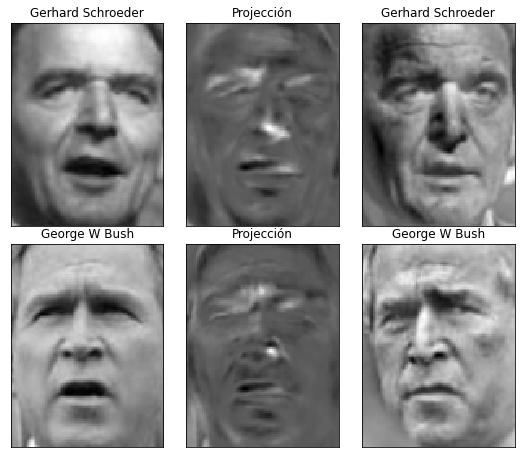

In [44]:
fig = plt.figure(figsize=(7,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.15)
# plot 25 random faces
j = 1
np.random.seed(10)

for i in np.random.choice(range(X_test.shape[0]), 2):
  print(i)
  ax = fig.add_subplot(2, 3, j, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_real_test[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title(names_test[i])
  #ax = fig.add_subplot(2, 3, j+1, xticks=[], yticks=[])
  #ax.imshow(np.reshape(X_test[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  #ax.set_title("Normalizado")
  ax = fig.add_subplot(2, 3, j+1, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_test_proj[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Projección")
  ax = fig.add_subplot(2, 3, j+2, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_train[proba_test.loc[i,"neighbors"],:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title(names_train[proba_test.loc[i,"neighbors"]])
  j += 3
plt.show()

In [ ]:
X_test.shape

(258, 11750)

In [45]:
confusion_matrix(knn.predict(X_test_pca), y_test)

array([[  5,   1,   3,   3,   2,   1,   0],
       [  0,  34,   2,   2,   1,   1,   0],
       [  1,   3,  12,   4,   2,   1,   2],
       [  5,   8,   5, 108,   4,   2,  11],
       [  0,   0,   0,   0,   7,   1,   0],
       [  0,   0,   0,   0,   0,   7,   0],
       [  0,   1,   0,   2,   3,   0,  14]])

In [46]:
lfw_people_fuera = fetch_lfw_people(min_faces_per_person=20, resize=1)
print(np.argmax(lfw_people_fuera.target_names=='Vicente Fox'))
filtro_vladimir = lfw_people_fuera.target==59

59


In [ ]:
lfw_people_fuera.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [47]:
X_real_vladimir = lfw_people_fuera.data[filtro_vladimir]
y_vladimir = lfw_people_fuera.target[filtro_vladimir]

In [48]:
X_vladimir = scaler.transform(X_real_vladimir)
X_vladimir_pca = pca.transform(X_vladimir)

In [49]:
proba_vladimir = pd.DataFrame(knn.predict_proba(X_vladimir_pca))
proba_vladimir["max_prob"] = proba_vladimir.max(axis=1)
proba_vladimir["name_max_prob"] = [dic_names[i] for i in proba_vladimir.idxmax(axis=1)]
proba_vladimir["neighbors"] = pd.DataFrame(knn.kneighbors(X_vladimir_pca)[1])[0].tolist()

(array([  1.,   3.,  43., 336., 540., 367., 158.,  58.,  29.,  13.]),
 array([ 1.28690114,  2.48786911,  3.68883708,  4.88980505,  6.09077302,
         7.29174099,  8.49270896,  9.69367693, 10.8946449 , 12.09561287,
        13.29658084]),
 <a list of 10 Patch objects>)

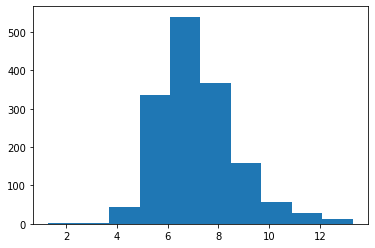

In [50]:
plt.hist(knn.kneighbors_graph(X_test_pca, mode='distance').data)

(array([1030.,   10.,  156., 1611., 2022.,  859.,  354.,   89.,   31.,
          18.]),
 array([ 0.        ,  1.61617175,  3.2323435 ,  4.84851526,  6.46468701,
         8.08085876,  9.69703051, 11.31320226, 12.92937402, 14.54554577,
        16.16171752]),
 <a list of 10 Patch objects>)

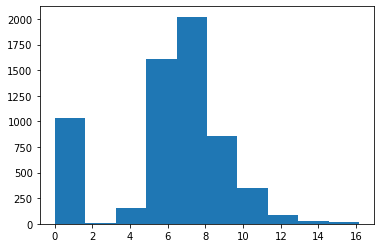

In [ ]:
plt.hist(knn.kneighbors_graph(X_train_pca, mode='distance').data)

(array([13., 24., 21., 45., 37., 18., 11., 17.,  1.,  5.]),
 array([ 5.99887373,  6.55774138,  7.11660904,  7.6754767 ,  8.23434436,
         8.79321201,  9.35207967,  9.91094733, 10.46981499, 11.02868264,
        11.5875503 ]),
 <a list of 10 Patch objects>)

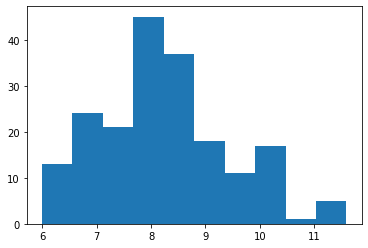

In [ ]:
plt.hist(knn.kneighbors_graph(X_vladimir_pca,mode='distance').data)

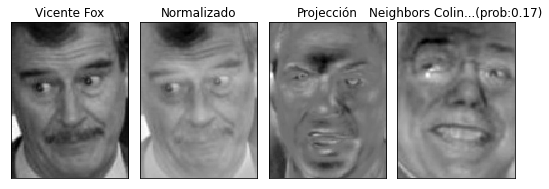

In [63]:
fig = plt.figure(figsize=(7,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.10)
# plot 25 random faces
j = 1
np.random.seed(10)

for i in [2]:
  ax = fig.add_subplot(2, 4, j, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_real_vladimir[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Vicente Fox")
  ax = fig.add_subplot(2, 4, j+1, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_vladimir[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Normalizado")
  ax = fig.add_subplot(2, 4, j+2, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_test_proj[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Projección")
  ax = fig.add_subplot(2, 4, j+3, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_train[proba_vladimir.loc[i,"neighbors"],:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Neighbors "+names_train[proba_vladimir.loc[i,"neighbors"]][0:5]+"...(prob:"+str(np.round(proba_vladimir.loc[i,"max_prob"],2))+")")
  j += 4
plt.show()

In [64]:
X_train

array([[-0.5072034 , -0.5012981 , -0.35147494, ..., -1.298187  ,
        -1.2670368 , -1.2571645 ],
       [ 2.5753424 ,  2.5581915 ,  2.5329463 , ...,  0.16244912,
         0.29182684,  0.32306656],
       [ 0.16560182,  0.07063346,  0.2462605 , ...,  1.7171879 ,
         1.7768496 ,  1.8329734 ],
       ...,
       [ 1.0786945 ,  1.0835726 ,  0.962153  , ...,  0.09289505,
         0.6487246 ,  1.3117452 ],
       [ 0.22739005,  0.2842465 ,  0.5312275 , ..., -0.6599258 ,
        -0.58605945, -0.5042795 ],
       [-1.6468529 , -1.6589429 , -1.6581526 , ...,  1.1853036 ,
         1.3789293 ,  1.4896245 ]], dtype=float32)

In [ ]:
cov = np.cov(X_train.T)
eig_val, eig_vec = np.linalg.eig(cov)

In [ ]:
eig_val